In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on fake.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

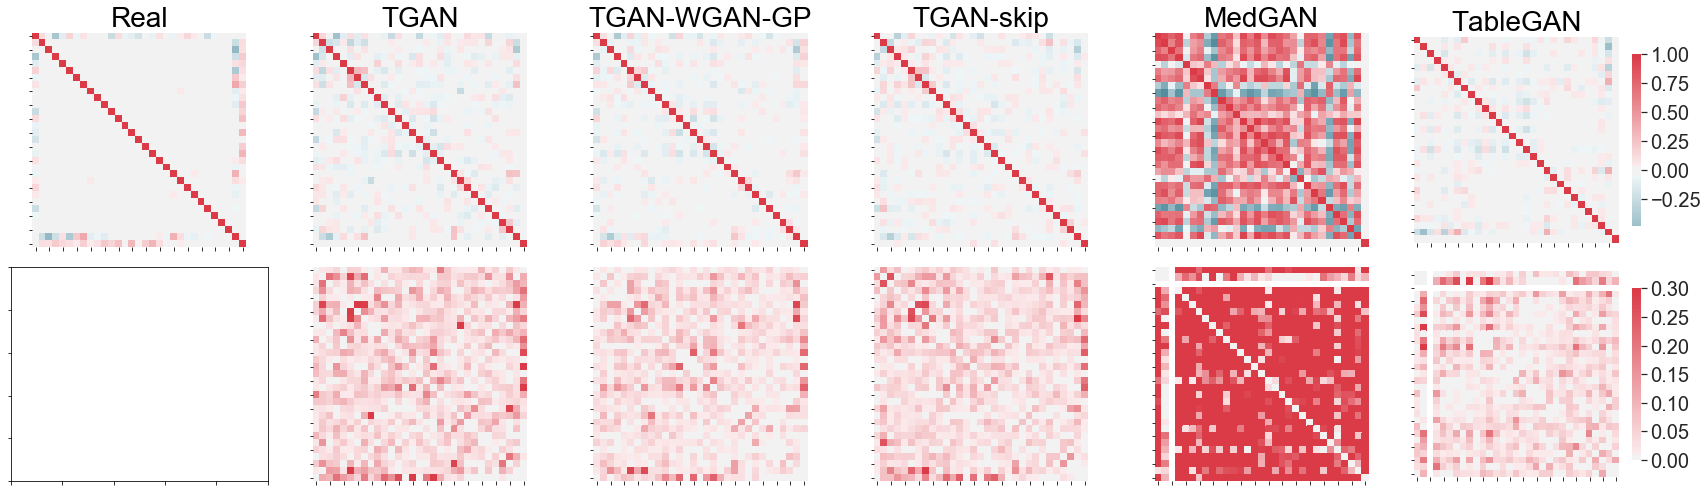

In [9]:
evaluators = [tgan_org_evaluator, wgan_evaluator, skip_evaluator, medgan_evaluator, tablegan_evaluator]
plot_correlation_comparison(evaluators, annot=False)
plt.savefig('../Master-Thesis/images/results/creditcard_correlation.png')

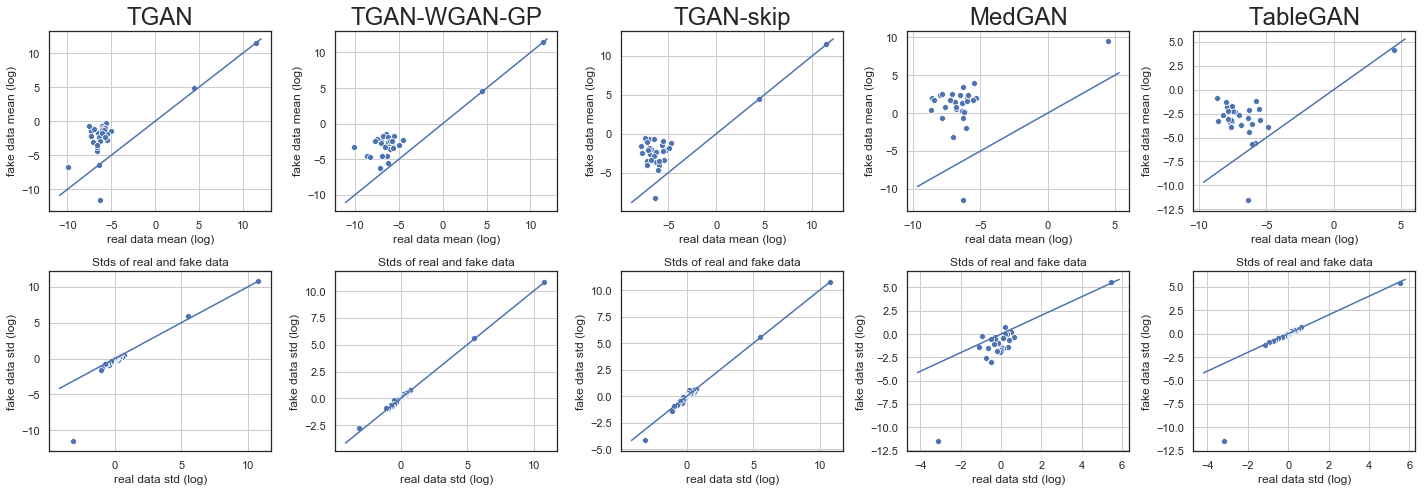

In [40]:
plot_mean_std_comparison(evaluators)
plt.savefig('../Master-Thesis/images/results/creditcard_mean_std.png')

# Creditcard

## Original TGAN

In [10]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan.csv', real_sep=',')
real, fake = real.drop(['Time'], axis=1), fake.drop(['Time'], axis=1)
tgan_org_evaluator = DataEvaluator(real, fake)

In [7]:
tgan_org_evaluator.pca_correlation()

0.8497414707033434

In [57]:
tgan_org_evaluator.statistical_evaluation()

0.8028062891631108

In [46]:
tgan_org_evaluator.get_copies()

Nr copied columns: 0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [47]:
tgan_org_evaluator.get_duplicates()

(3881, 0)

In [11]:
tgan_org_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: pearsonr

Regressor MSE-scores:
                                    real     fake
real_data_RandomForestRegressor  92.5842 250.9782
real_data_Lasso                  67.1744 203.5038
real_data_Ridge                  66.7812 209.3806
real_data_ElasticNet             93.6499 141.7484
fake_data_RandomForestRegressor 315.1587 247.9496
fake_data_Lasso                 322.8368 294.7807
fake_data_Ridge                 322.8336 294.5118
fake_data_ElasticNet            331.1087 312.0714

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.1043
Column Correlation distance MAE   0.0717
Duplicate rows between sets       2.0000
nearest neighbor mean             2.9630
nearest neighbor std              2.3003

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.8028
Correlation column correlations                 0.0968

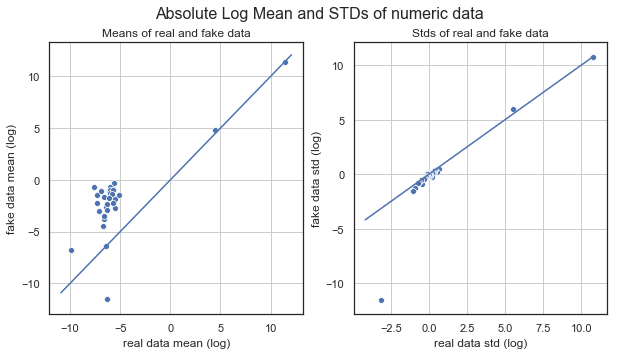

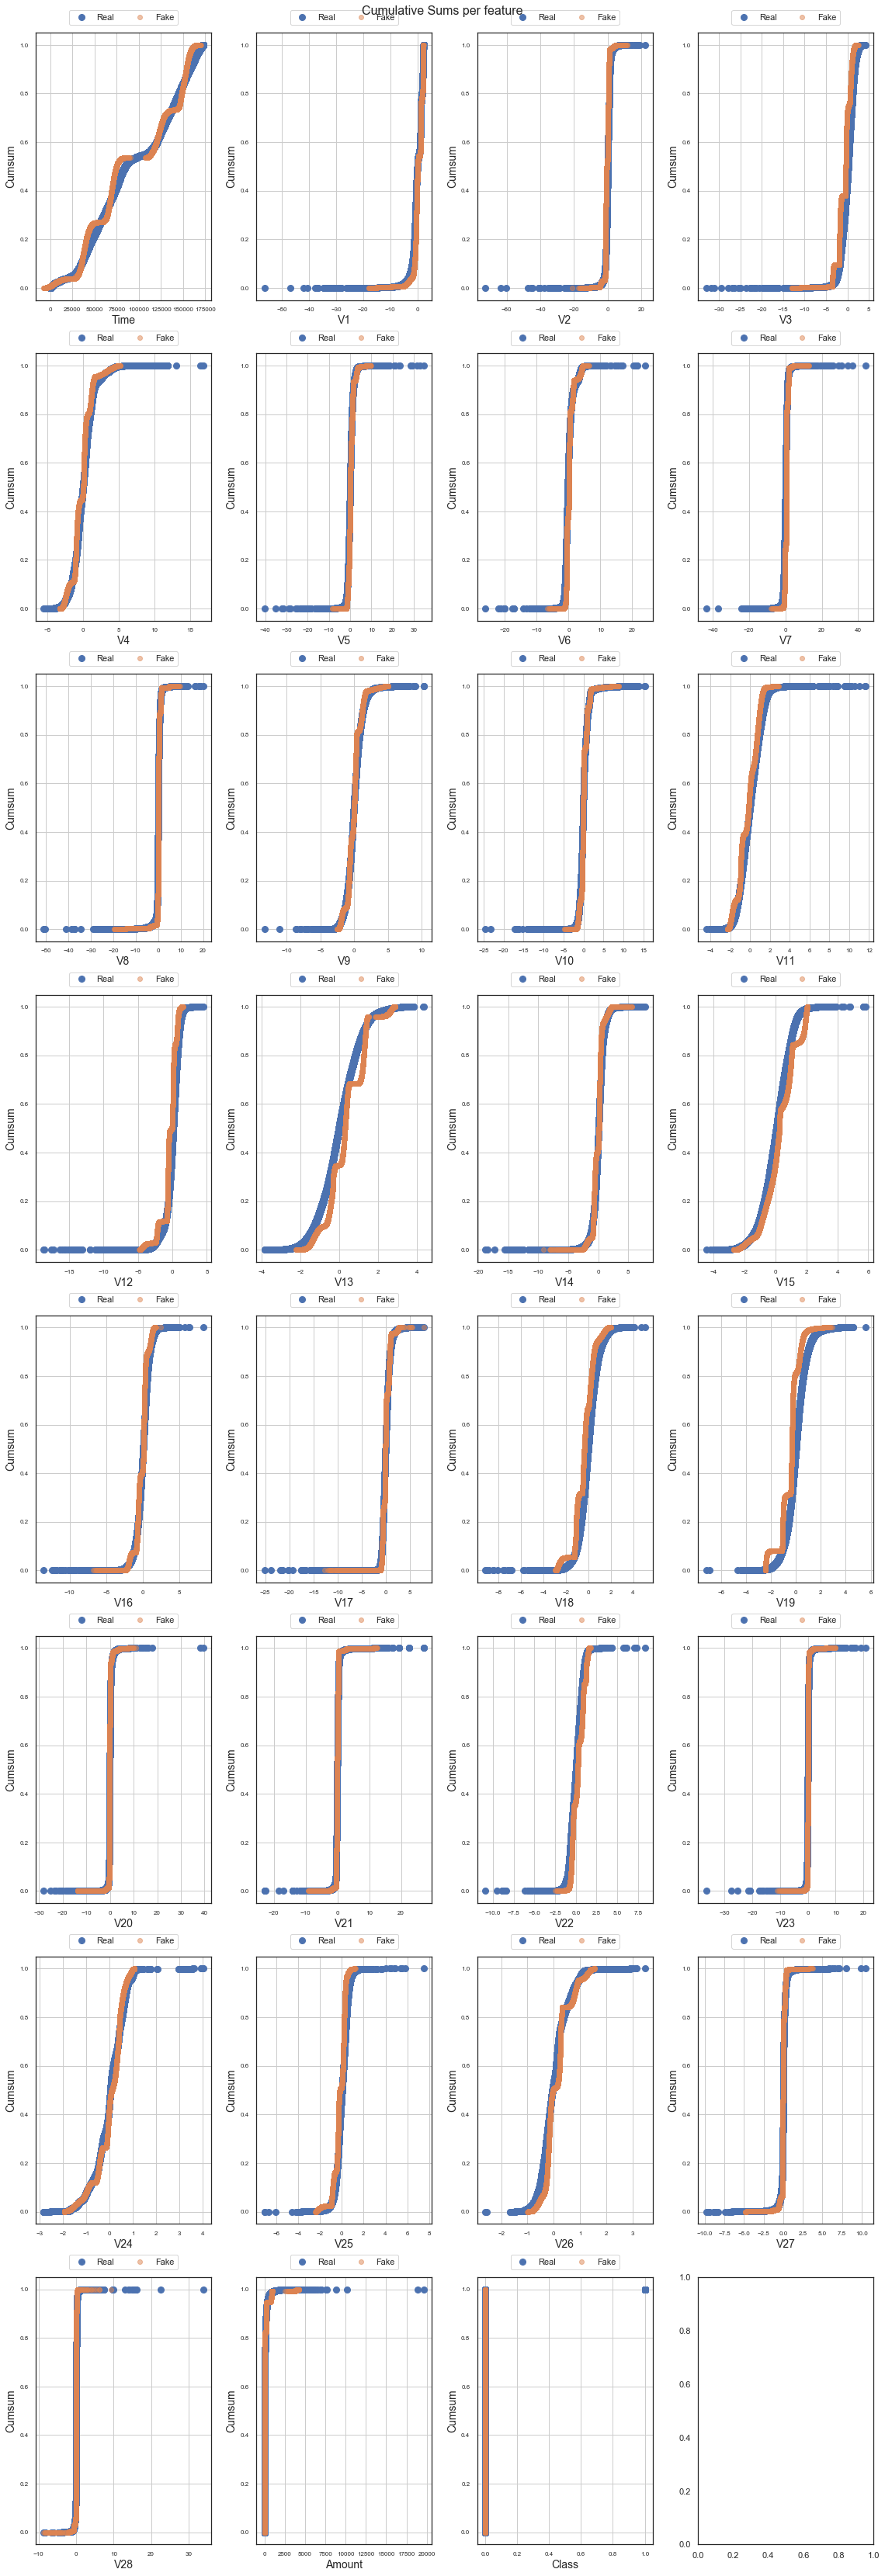

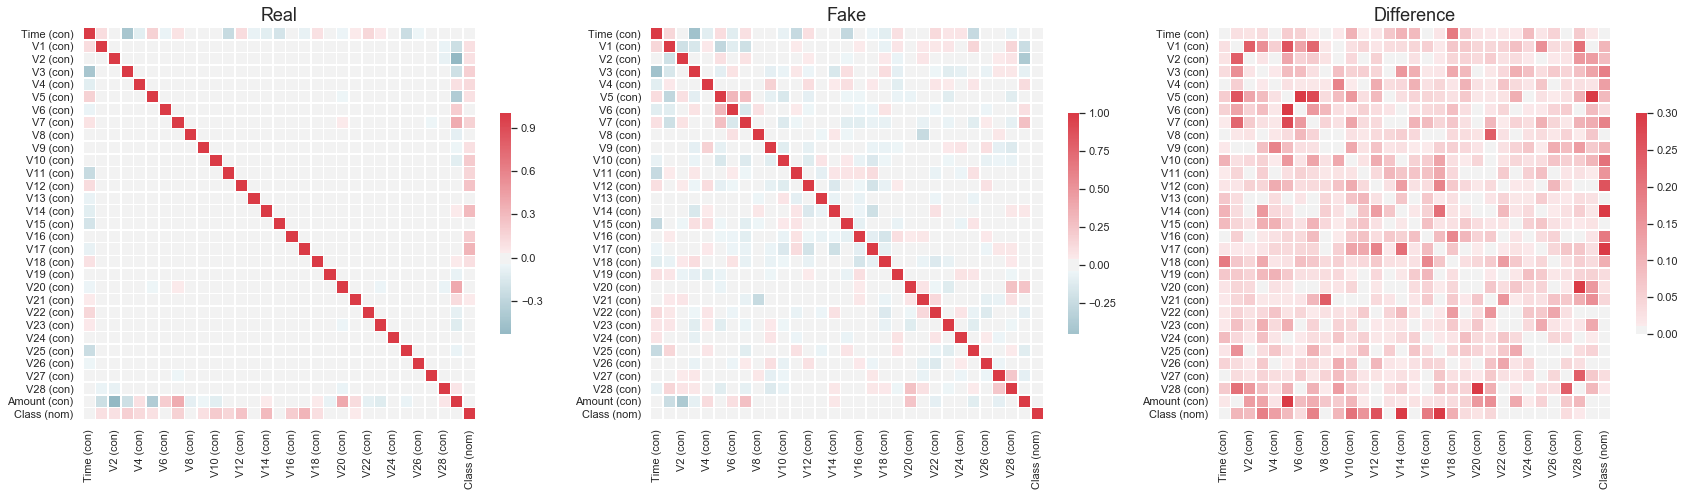

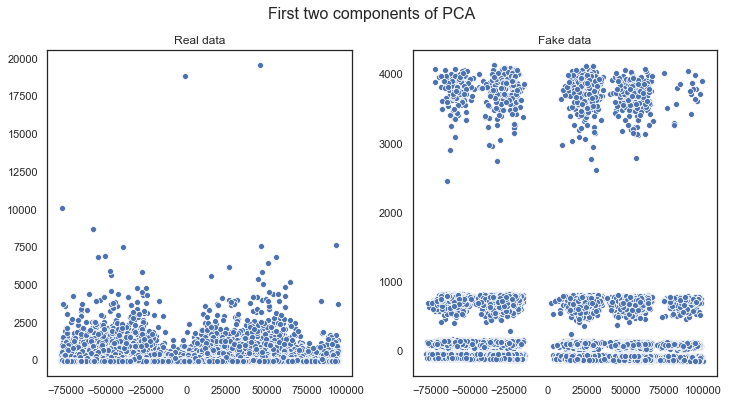

In [29]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [12]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-wgan-gp.csv', real_sep=',')
real, fake = real.drop(['Time'], axis=1), fake.drop(['Time'], axis=1)
wgan_evaluator = DataEvaluator(real, fake)

In [58]:
wgan_evaluator.statistical_evaluation()

0.8661130972975051

In [49]:
wgan_evaluator.get_copies()

Nr copied columns: 0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [50]:
wgan_evaluator.get_duplicates()

(3881, 0)

In [9]:
wgan_evaluator.estimator_evaluation(target_col='Amount', target_type='regr')


Regressor MSE-scores:
                                       real        fake
real_data_RandomForestRegressor   90.860726  162.617841
real_data_Lasso                   69.752412  130.692460
real_data_Ridge                   69.344087  129.106060
real_data_ElasticNet              97.973486  154.399242
fake_data_RandomForestRegressor  223.371743  202.326310
fake_data_Lasso                  252.980878  219.334970
fake_data_Ridge                  255.066703  219.510701
fake_data_ElasticNet             228.595605  220.553975


0.9767940328175849

In [7]:
wgan_evaluator.estimator_evaluation(target_col='Class')

C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



Classifier F1-scores:
                                        real     fake
real_data_LogisticRegression_F1      0.99900  0.99855
real_data_RandomForestClassifier_F1  0.99905  0.99815
real_data_DecisionTreeClassifier_F1  0.99895  0.99435
real_data_MLPClassifier_F1           0.99805  0.99805
fake_data_LogisticRegression_F1      0.99270  0.99585
fake_data_RandomForestClassifier_F1  0.99625  0.99630
fake_data_DecisionTreeClassifier_F1  0.99520  0.99410
fake_data_MLPClassifier_F1           0.99595  0.99600


0.9987081246957891

In [13]:
wgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: pearsonr

Regressor MSE-scores:
                                    real     fake
real_data_RandomForestRegressor  84.8920 162.5277
real_data_Lasso                  61.0696 134.3301
real_data_Ridge                  60.6823 132.7039
real_data_ElasticNet             86.1852 159.5118
fake_data_RandomForestRegressor 230.4456 209.6482
fake_data_Lasso                 260.0207 226.7436
fake_data_Ridge                 261.6892 226.6178
fake_data_ElasticNet            237.0183 229.5679

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0859
Column Correlation distance MAE   0.0590
Duplicate rows between sets       2.0000
nearest neighbor mean             2.8908
nearest neighbor std              2.3605

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.8661
Correlation column correlations                 0.2932

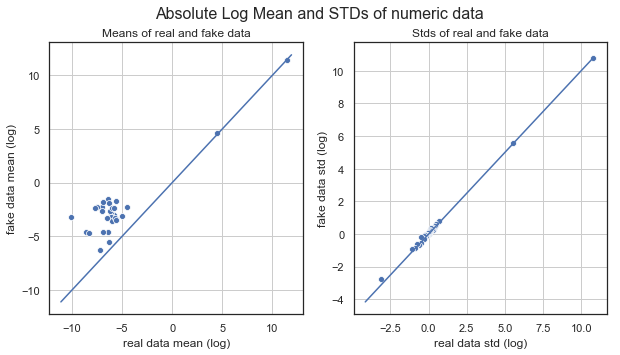

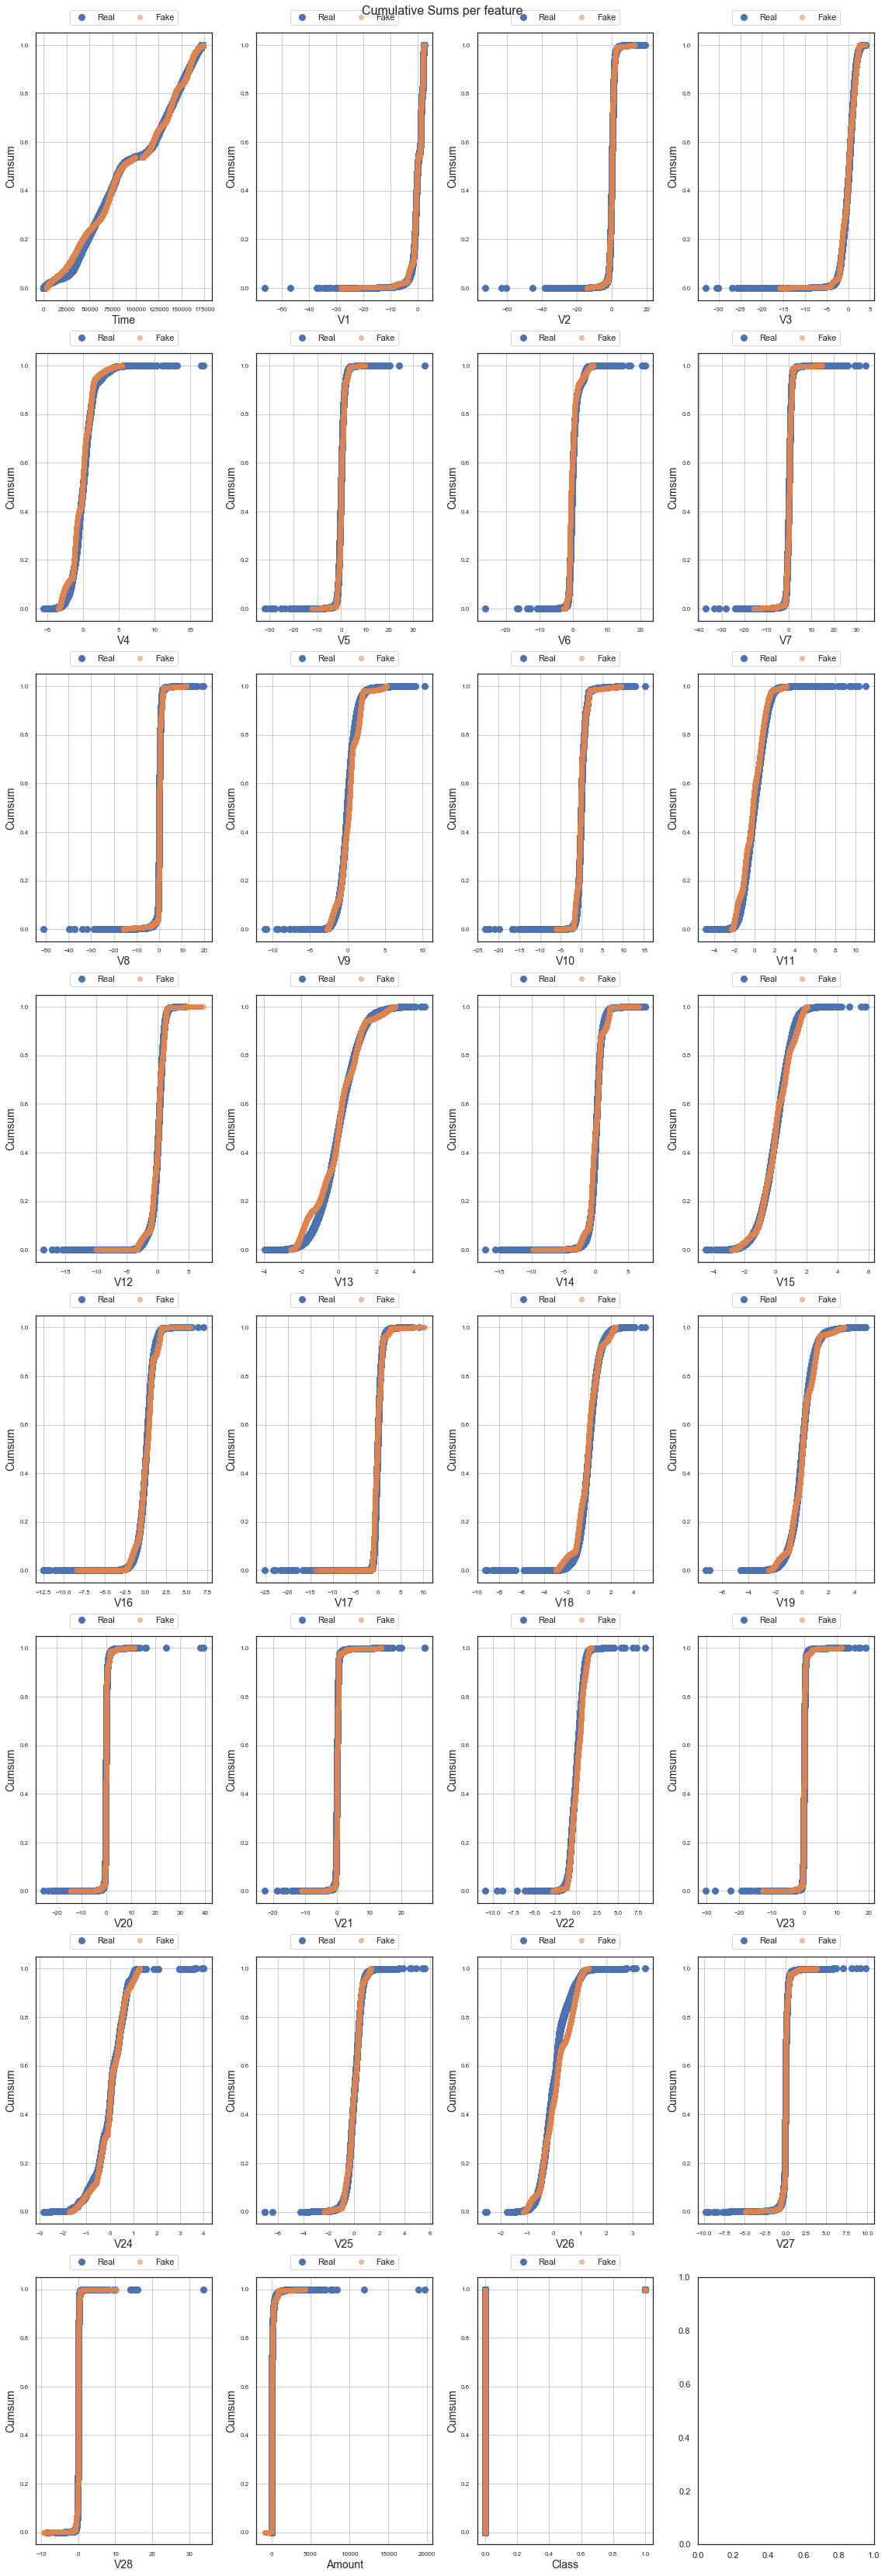

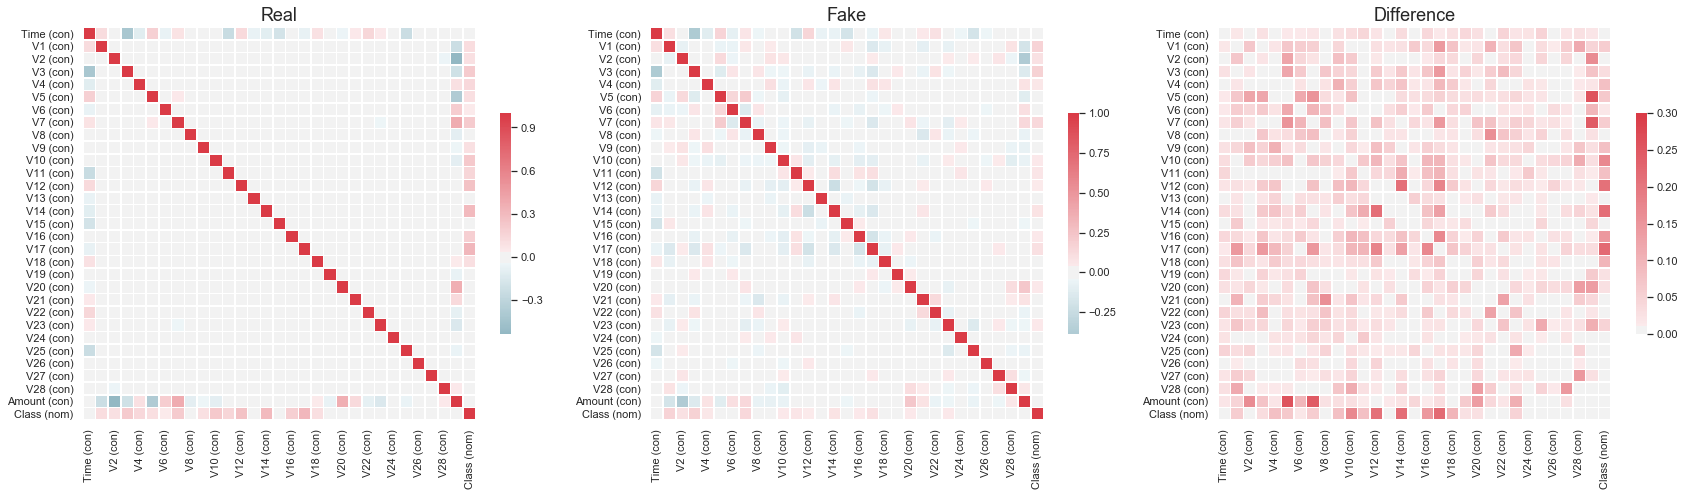

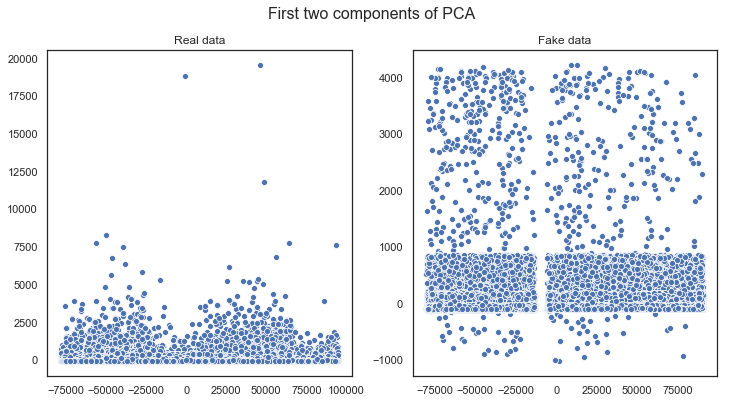

In [30]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [14]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-skip-connections.csv', real_sep=',')
real, fake = real.drop(['Time'], axis=1), fake.drop(['Time'], axis=1)
skip_evaluator = DataEvaluator(real, fake)

In [59]:
skip_evaluator.statistical_evaluation()

0.8799369545996233

In [52]:
skip_evaluator.get_copies()

Nr copied columns: 0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [53]:
skip_evaluator.get_duplicates()

(3881, 0)

In [11]:
skip_evaluator.estimator_evaluation(target_col='Amount', target_type='regr')


Regressor MSE-scores:
                                       real        fake
real_data_RandomForestRegressor   88.218107  167.311413
real_data_Lasso                   72.738541  129.836637
real_data_Ridge                   72.770291  128.917830
real_data_ElasticNet              90.220360  152.088504
fake_data_RandomForestRegressor  230.273964  206.351498
fake_data_Lasso                  256.310128  228.099281
fake_data_Ridge                  258.017044  228.125672
fake_data_ElasticNet             235.322669  230.798821


0.9677433037943776

In [15]:
skip_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: pearsonr

Regressor MSE-scores:
                                    real     fake
real_data_RandomForestRegressor  96.4260 169.2357
real_data_Lasso                  64.4387 128.4882
real_data_Ridge                  64.0477 128.1694
real_data_ElasticNet             85.1603 151.5209
fake_data_RandomForestRegressor 233.7670 203.8868
fake_data_Lasso                 252.4919 224.1399
fake_data_Ridge                 253.8785 224.0223
fake_data_ElasticNet            233.3898 226.2616

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0922
Column Correlation distance MAE   0.0652
Duplicate rows between sets       2.0000
nearest neighbor mean             2.8696
nearest neighbor std              2.1728

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.8799
Correlation column correlations                 0.2114

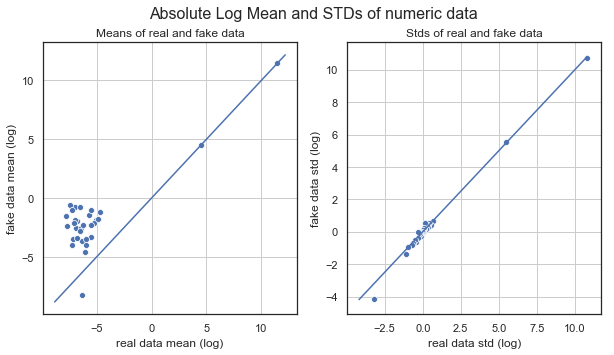

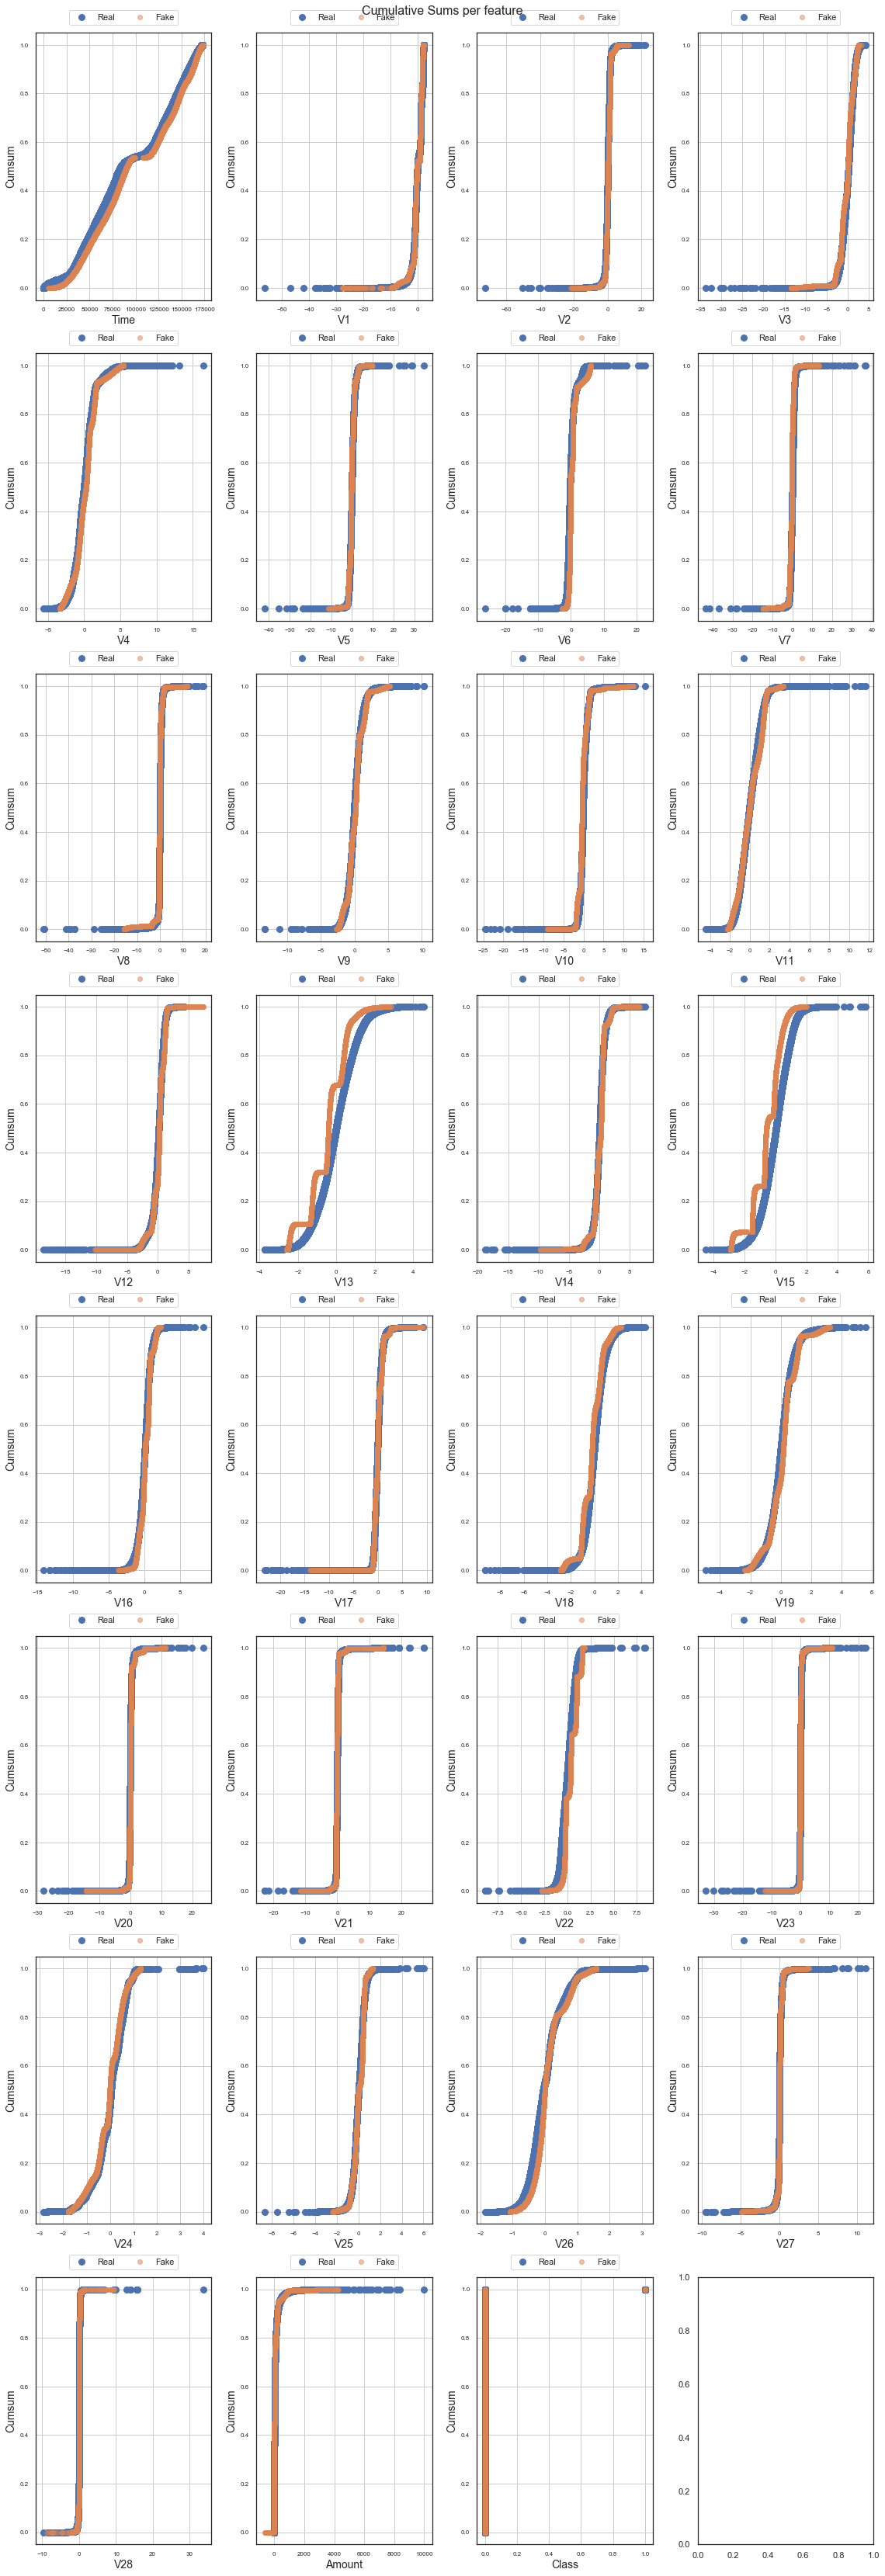

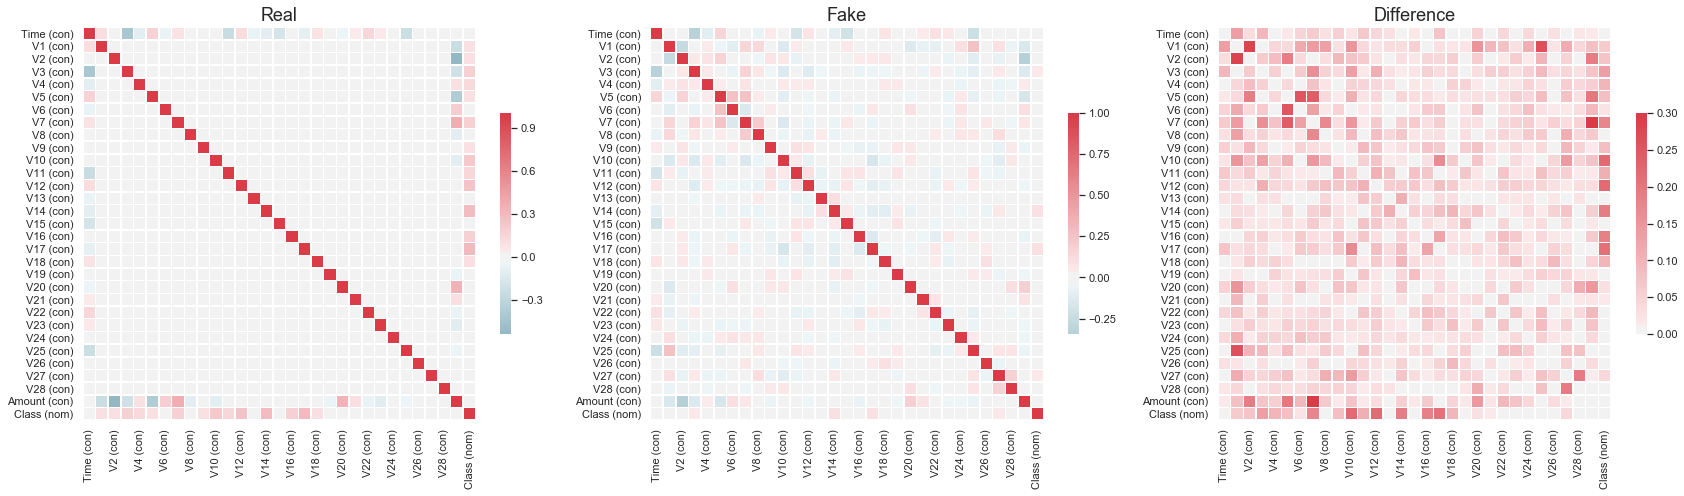

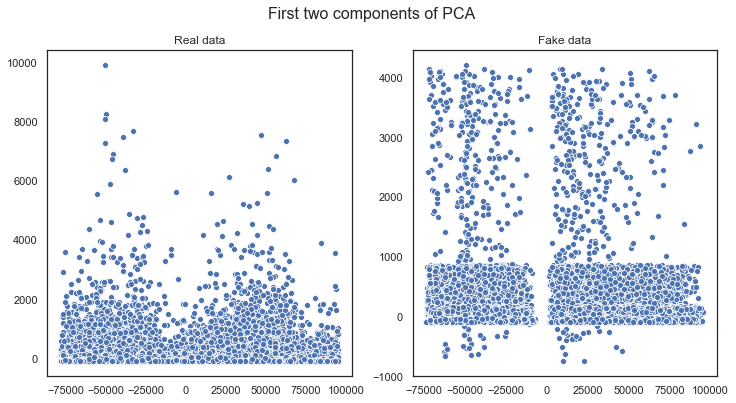

In [31]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [16]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_medgan_100.csv', real_sep=',')
medgan_evaluator = DataEvaluator(real, fake)

In [60]:
medgan_evaluator.statistical_evaluation()

-0.032929689001653016

In [40]:
medgan_evaluator.get_copies()

Nr copied columns: 0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [41]:
medgan_evaluator.get_duplicates()

(3881, 212)

In [13]:
medgan_evaluator.estimator_evaluation(target_col='Amount', target_type='regr')


Regressor MSE-scores:
                                        real          fake
real_data_RandomForestRegressor    87.471789  13104.790235
real_data_Lasso                    78.134067  10671.886103
real_data_Ridge                    78.201512   8512.769427
real_data_ElasticNet               96.869938   9964.626606
fake_data_RandomForestRegressor  8847.056902     47.640815
fake_data_Lasso                  5233.045892     33.005490
fake_data_Ridge                  4959.348781     11.413325
fake_data_ElasticNet             7156.601988     70.430880


-0.9220969611885341

In [17]:
medgan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: pearsonr

Regressor MSE-scores:
                                       real        fake
real_data_RandomForestRegressor     84.7783 13,123.1469
real_data_Lasso                     60.1019 10,825.3913
real_data_Ridge                     59.7403  8,685.7738
real_data_ElasticNet                84.7966  9,958.3690
fake_data_RandomForestRegressor 10,653.4582     47.7002
fake_data_Lasso                  4,561.5985     32.9229
fake_data_Ridge                  4,261.7899     12.1660
fake_data_ElasticNet             6,790.8379     70.9396

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.5630
Column Correlation distance MAE   0.4864
Duplicate rows between sets       2.0000
nearest neighbor mean             4.6060
nearest neighbor std              2.9841

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                               -0.0329


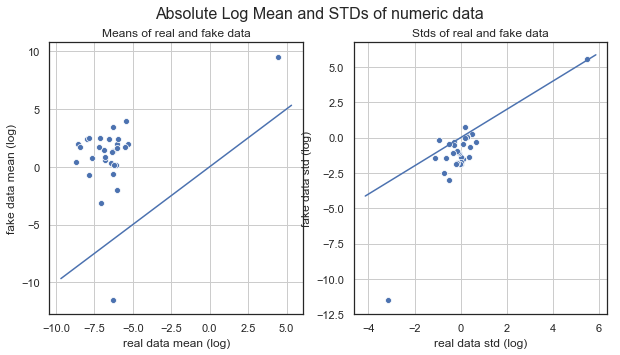

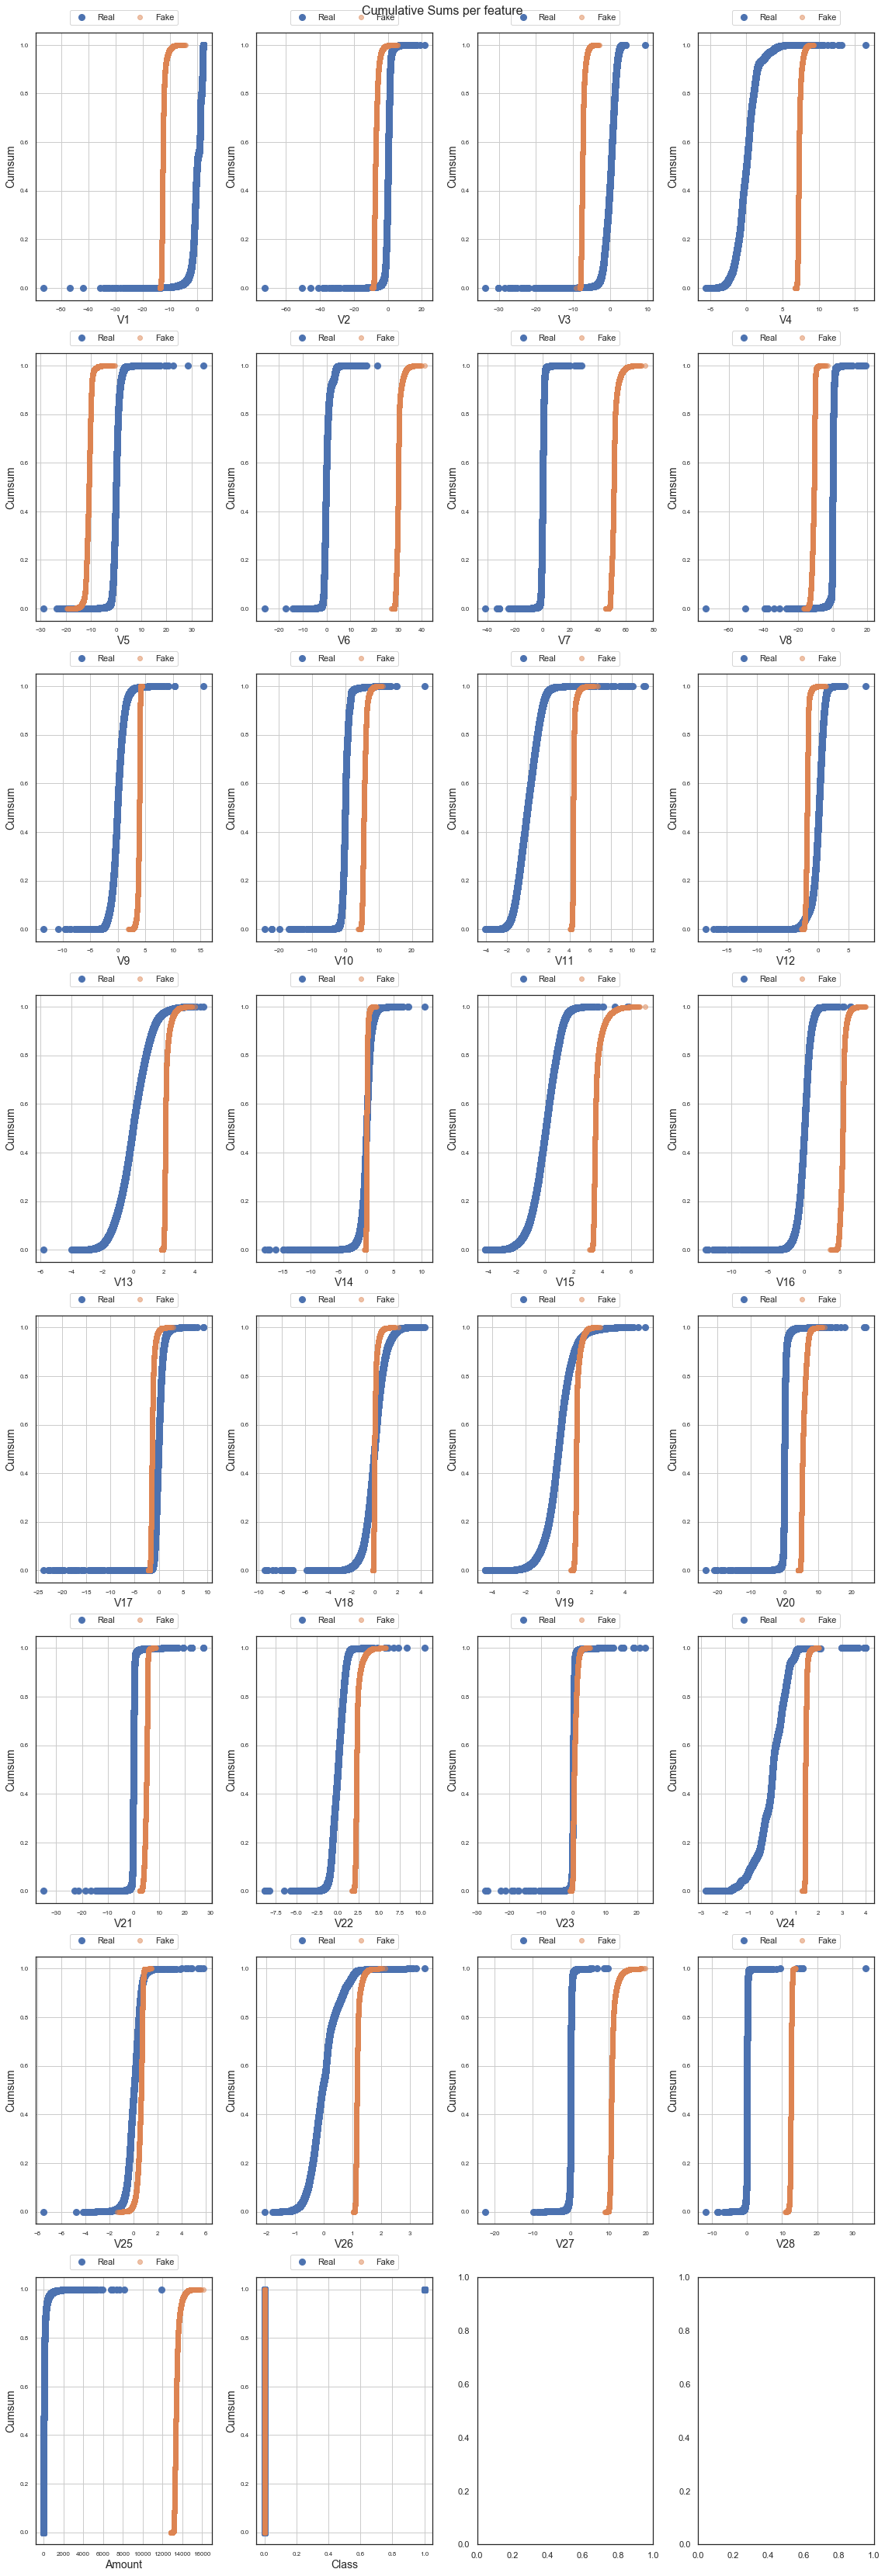

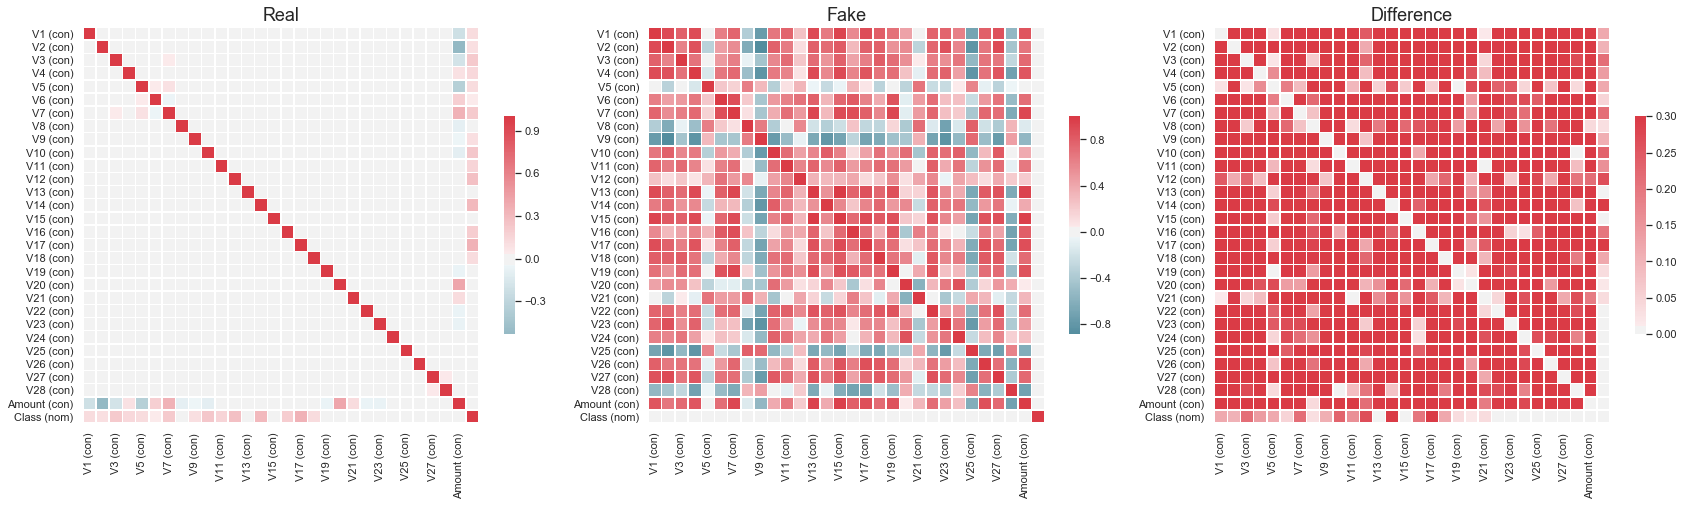

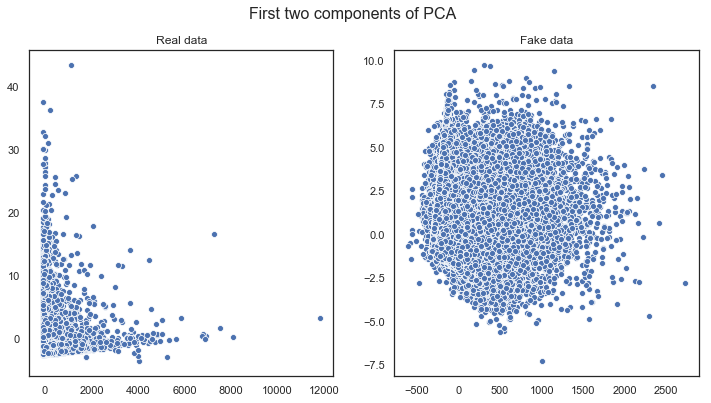

In [32]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [18]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_tablegan_100.csv', real_sep=',')
tablegan_evaluator = DataEvaluator(real, fake)

In [61]:
tablegan_evaluator.statistical_evaluation()

0.8734325145119748

In [55]:
tablegan_evaluator.get_copies()

Nr copied columns: 0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [56]:
tablegan_evaluator.get_duplicates()

(3881, 0)

In [15]:
tablegan_evaluator.estimator_evaluation(target_col='Amount', target_type='regr')


Regressor MSE-scores:
                                       real        fake
real_data_RandomForestRegressor   79.201818  104.148689
real_data_Lasso                   63.376182   76.840459
real_data_Ridge                   63.563661   83.624191
real_data_ElasticNet              87.094321  100.652574
fake_data_RandomForestRegressor  111.206143  103.136741
fake_data_Lasso                  115.657088  104.565373
fake_data_Ridge                  116.694599  104.079321
fake_data_ElasticNet             117.503527  119.004116


0.8315895442240008

In [19]:
tablegan_evaluator.evaluate(target_col='Amount', target_type='regr', verbose=False)


Correlation metric: pearsonr

Regressor MSE-scores:
                                    real     fake
real_data_RandomForestRegressor  89.0632 131.1600
real_data_Lasso                  64.9166  91.6295
real_data_Ridge                  64.1100 109.3254
real_data_ElasticNet             96.6757 123.9496
fake_data_RandomForestRegressor 125.6842 109.0230
fake_data_Lasso                 128.3952 107.1349
fake_data_Ridge                 130.5609 106.6054
fake_data_ElasticNet            121.5737 123.9160

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0945
Column Correlation distance MAE   0.0645
Duplicate rows between sets       2.0000
nearest neighbor mean             2.8493
nearest neighbor std              2.2365

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.8734
Correlation column correlations                 0.2157

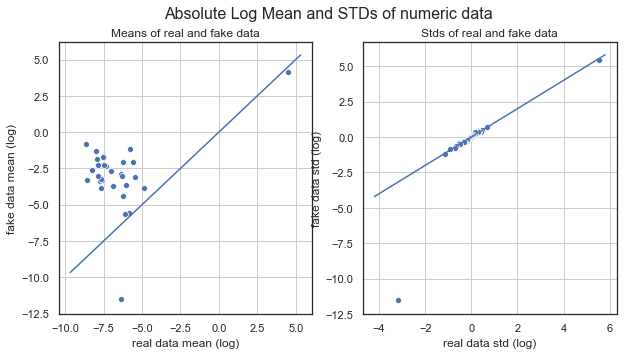

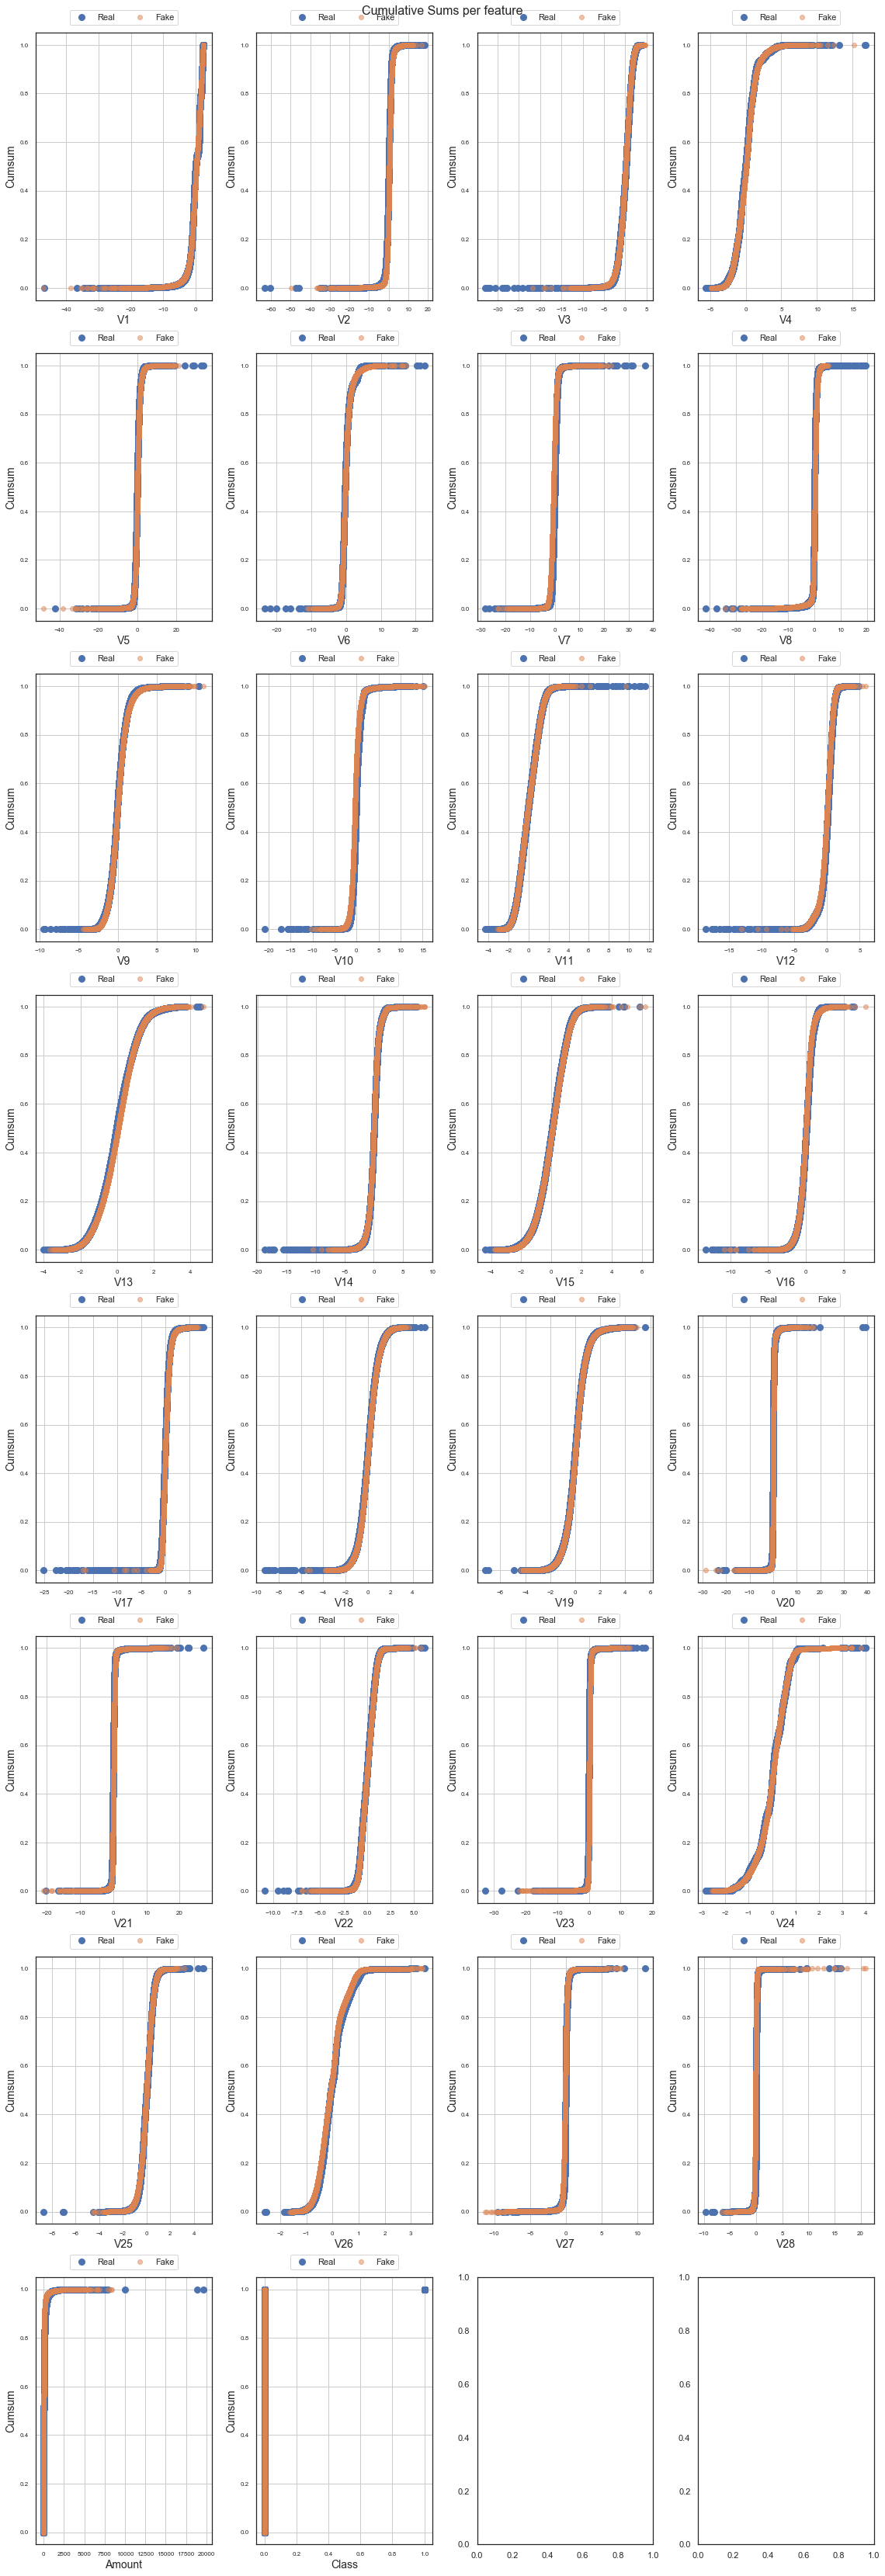

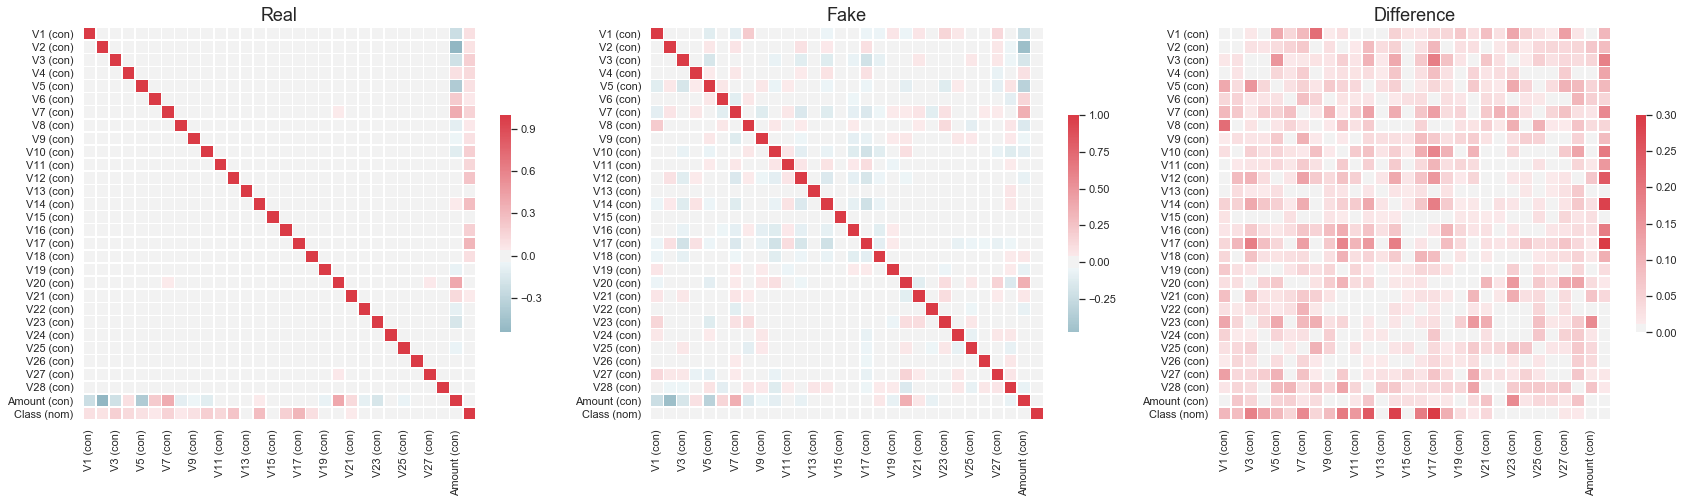

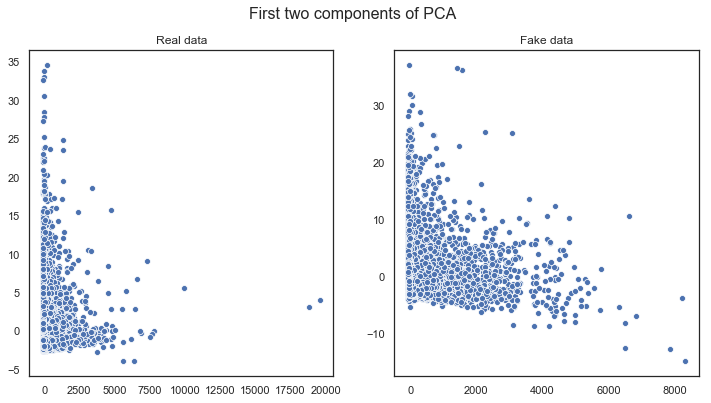

In [33]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [66]:
target_col = 'Amount'
x = numerical_encoding(tgan_org_evaluator.fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

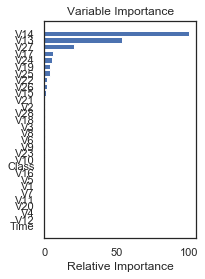

In [70]:
feature_importance = tgan_org_evaluator.f_estimators[0].feature_importances_
# print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
# print(column_names)
# print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

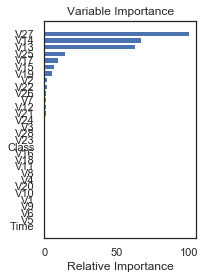

In [72]:
feature_importance = tgan_org_evaluator.r_estimators[0].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()